# Holt Winters Method on Energy Dataset

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [2]:
df = pd.read_csv("EnergyProduction.csv", index_col= 0, parse_dates= True)

In [3]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [4]:
df.shape

(240, 1)

In [5]:
# Adding Frequency to Date Index:

df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [6]:
df.index.freq = "MS"

In [7]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

<AxesSubplot:xlabel='DATE'>

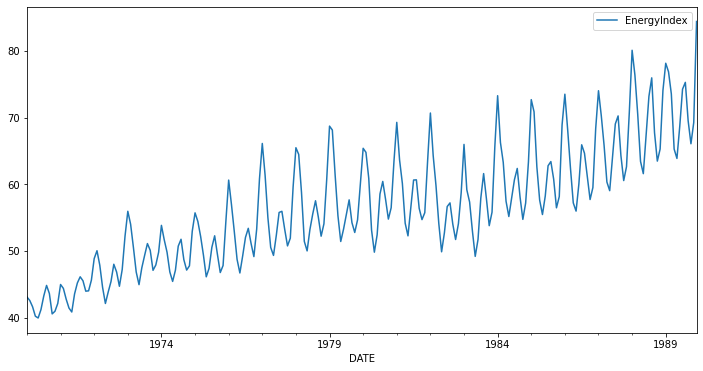

In [8]:
df.plot(figsize= (12,6))

In [9]:
# adding Simple Moving Average of 12 Months to Data:

df["SMA - 12 Months"] = df["EnergyIndex"].rolling(window= 12).mean()

In [10]:
df

,EnergyIndex,SMA - 12 Months
DATE,,
1970-01-01,43.0869,NaN
1970-02-01,42.5577,NaN
1970-03-01,41.6215,NaN
1970-04-01,40.1982,NaN
1970-05-01,39.9321,NaN
...,...,...
1989-08-01,75.2704,70.527767
1989-09-01,69.5107,70.676800
1989-10-01,66.0620,70.893700


<AxesSubplot:xlabel='DATE'>

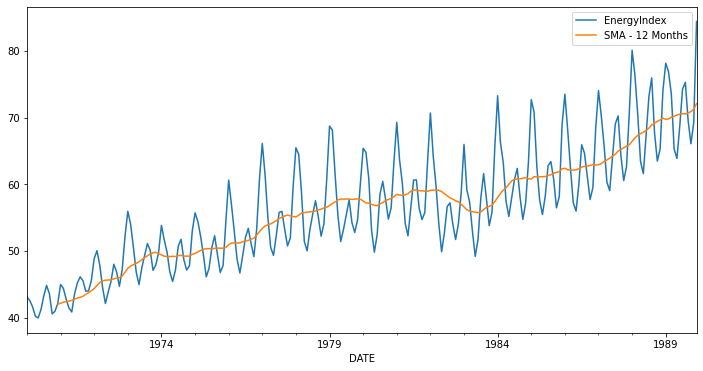

In [11]:
df.plot(figsize= (12,6))

In [12]:
# Adding Exponentially Weighted Moving Average (EWMA) for 12 Months or Simple Exponential Smoothing using Statsmodels:

df["SES - 12 Months"] = SimpleExpSmoothing(
    df["EnergyIndex"]).fit(smoothing_level= 2/(12+1), optimized= False).fittedvalues.shift(-1)

In [13]:
df.head()

,EnergyIndex,SMA - 12 Months,SES - 12 Months
DATE,,,
1970-01-01,43.0869,NaN,43.086900
1970-02-01,42.5577,NaN,43.005485
1970-03-01,41.6215,NaN,42.792564
1970-04-01,40.1982,NaN,42.393431
1970-05-01,39.9321,NaN,42.014765


<AxesSubplot:xlabel='DATE'>

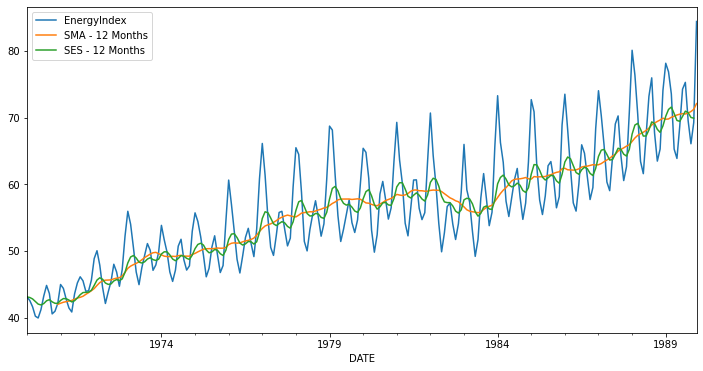

In [14]:
df.plot(figsize= (12,6))

In [15]:
# Adding Double Exponential Smoothing Using Holt Winters Multiplicative:

df["DES - 12 Months"] = ExponentialSmoothing(df["EnergyIndex"], trend= "mul").fit().fittedvalues.shift(-1)

In [16]:
df.head()

,EnergyIndex,SMA - 12 Months,SES - 12 Months,DES - 12 Months
DATE,,,,
1970-01-01,43.0869,NaN,43.086900,43.114533
1970-02-01,42.5577,NaN,43.005485,42.584994
1970-03-01,41.6215,NaN,42.792564,41.648194
1970-04-01,40.1982,NaN,42.393431,40.223981
1970-05-01,39.9321,NaN,42.014765,39.957710


<AxesSubplot:xlabel='DATE'>

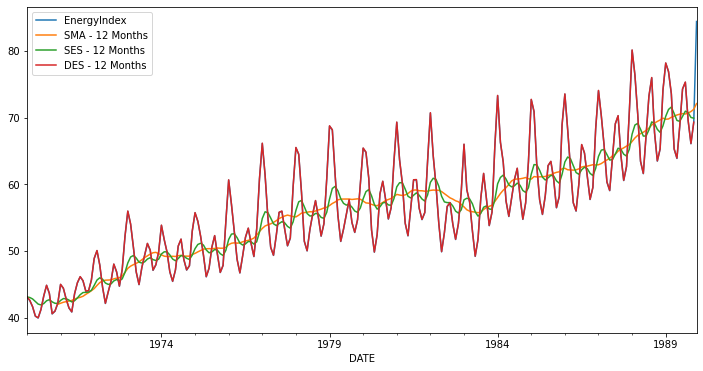

In [17]:
df.plot(figsize= (12,6))

In [18]:
# Adding Triple Exponential Smoothing Using Holt Winters Multiplicative:

df["TES - 12 Months"] = ExponentialSmoothing(df["EnergyIndex"], trend= "mul", seasonal= "mul",
                                            seasonal_periods= 12).fit().fittedvalues

In [19]:
df.head()

,EnergyIndex,SMA - 12 Months,SES - 12 Months,DES - 12 Months,TES - 12 Months
DATE,,,,,
1970-01-01,43.0869,NaN,43.086900,43.114533,43.086987
1970-02-01,42.5577,NaN,43.005485,42.584994,41.068159
1970-03-01,41.6215,NaN,42.792564,41.648194,39.724743
1970-04-01,40.1982,NaN,42.393431,40.223981,37.961982
1970-05-01,39.9321,NaN,42.014765,39.957710,38.600731


<AxesSubplot:xlabel='DATE'>

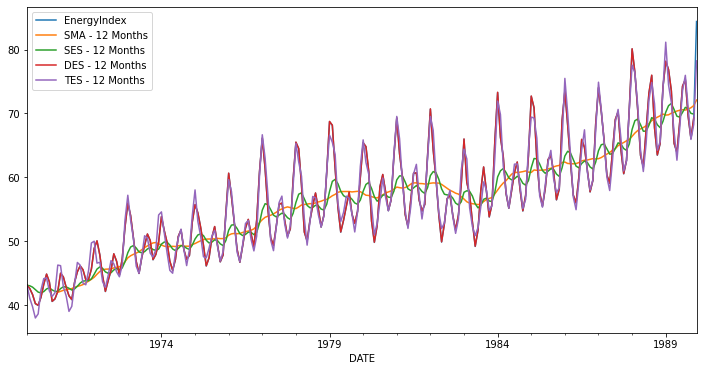

In [20]:
df.plot(figsize= (12,6))

<AxesSubplot:xlabel='DATE'>

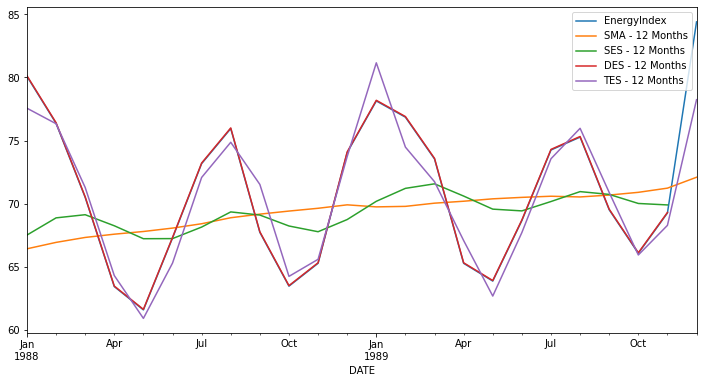

In [21]:
df[-24:].plot(figsize= (12,6))